In [3]:
!pip install streamlit pandas numpy scikit-learn plotly streamlit-extras

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import plotly.express as px
import plotly.graph_objects as go
import streamlit as st
from streamlit_extras.stylable_container import stylable_container
import time
import uuid


[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
# Simulate initial policy data
np.random.seed(42)
n_policies = 1000

# Initialize session state for policies and claims
if 'policies' not in st.session_state:
    policies = pd.DataFrame({
        'policy_id': [str(uuid.uuid4()) for _ in range(n_policies)],
        'policy_type': np.random.choice(['Auto', 'Home', 'Health', 'Commercial'], n_policies),
        'region': np.random.choice(['North', 'South', 'East', 'West'], n_policies),
        'coverage_amount': np.random.uniform(50000, 1000000, n_policies),
        'premium': np.random.uniform(1000, 10000, n_policies),
        'risk_score': np.random.uniform(0, 1, n_policies),
        'claims': np.zeros(n_policies),
        'last_updated': [time.time()] * n_policies
    })
    policies.to_csv('streamlit_insurance_policies.csv', index=False)
    st.session_state.policies = policies
    st.session_state.claims = pd.DataFrame(columns=['policy_id', 'claim_amount', 'claim_time'])

@st.cache_data
def get_policies():
    return st.session_state.policies

def simulate_real_time_claims():
    policies = st.session_state.policies
    new_claims = pd.DataFrame({
        'policy_id': np.random.choice(policies['policy_id'], size=5),
        'claim_amount': np.random.uniform(10000, 200000, 5),
        'claim_time': [time.time()] * 5
    })
    st.session_state.claims = pd.concat([st.session_state.claims, new_claims], ignore_index=True)
    for policy_id, claim_amount in zip(new_claims['policy_id'], new_claims['claim_amount']):
        policies.loc[policies['policy_id'] == policy_id, 'claims'] += claim_amount
    policies.to_csv('streamlit_insurance_policies.csv', index=False)
    return new_claims

# Generate and display initial data
policies = get_policies()
new_claims = simulate_real_time_claims()
policies.head()

2025-07-08 12:23:12.102 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-08 12:23:12.107 WARNING streamlit.runtime.state.session_state_proxy: Session state does not function when running a script without `streamlit run`
2025-07-08 12:23:12.167 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-08 12:23:12.168 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-08 12:23:12.170 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-08 12:23:12.171 WARNING streamlit.runtime.scriptrunner_utils.script_run_c

,policy_id,policy_type,region,coverage_amount,premium,risk_score,claims,last_updated
0,b7120ed7-e4bb-4420-9057-1948c3cec491,Health,South,225876.282397,3355.351154,0.672703,0.0,1.751958e+09
1,1a5d2179-fc7e-43f8-8f5b-e0e8a2d9758c,Commercial,East,564805.900009,3222.809192,0.796681,0.0,1.751958e+09
2,96058dc7-fbbf-435a-a2ba-00070a4d80af,Auto,North,879298.544083,9156.291225,0.250468,0.0,1.751958e+09
3,93fd2d8f-21d5-47fc-ab85-a96e26192151,Health,North,745613.642089,3245.915799,0.624874,0.0,1.751958e+09
4,c1244a1d-0f73-4788-b52a-8039a8e3c1e0,Health,North,816233.090468,3447.547535,0.571746,0.0,1.751958e+09


In [5]:
import pandas as pd
import numpy as np
import time
import uuid

# Simulate initial policy data
np.random.seed(42)
n_policies = 1000

# Initialize state for policies and claims
global_state = {}
if 'policies' not in global_state:
    policies = pd.DataFrame({
        'policy_id': [str(uuid.uuid4()) for _ in range(n_policies)],
        'policy_type': np.random.choice(['Auto', 'Home', 'Health', 'Commercial'], n_policies),
        'region': np.random.choice(['North', 'South', 'East', 'West'], n_policies),
        'coverage_amount': np.random.uniform(50000, 1000000, n_policies),
        'premium': np.random.uniform(1000, 10000, n_policies),
        'risk_score': np.random.uniform(0, 1, n_policies),
        'claims': np.zeros(n_policies),
        'last_updated': [time.time()] * n_policies
    })
    policies.to_csv('streamlit_insurance_policies.csv', index=False)
    global_state['policies'] = policies
    global_state['claims'] = pd.DataFrame({
        'policy_id': pd.Series(dtype='str'),
        'claim_amount': pd.Series(dtype='float64'),
        'claim_time': pd.Series(dtype='float64')
    })

def get_policies():
    return global_state['policies']

def simulate_real_time_claims():
    policies = global_state['policies']
    new_claims = pd.DataFrame({
        'policy_id': np.random.choice(policies['policy_id'], size=5),
        'claim_amount': np.random.uniform(10000, 200000, 5),
        'claim_time': [time.time()] * 5
    })
    global_state['claims'] = pd.concat([global_state['claims'], new_claims], ignore_index=True)
    for policy_id, claim_amount in zip(new_claims['policy_id'], new_claims['claim_amount']):
        policies.loc[policies['policy_id'] == policy_id, 'claims'] += claim_amount
    policies.to_csv('streamlit_insurance_policies.csv', index=False)
    return new_claims

# Generate and display initial data
policies = get_policies()
new_claims = simulate_real_time_claims()
policies.head()

,policy_id,policy_type,region,coverage_amount,premium,risk_score,claims,last_updated
0,33b05725-45a2-4402-bc2c-41293af40dd8,Health,South,225876.282397,3355.351154,0.672703,0.0,1.751958e+09
1,b4e69318-34ec-4d60-b646-d984aa1f8827,Commercial,East,564805.900009,3222.809192,0.796681,0.0,1.751958e+09
2,cdfd59c3-bf34-428c-9678-2ebe8118dc5a,Auto,North,879298.544083,9156.291225,0.250468,0.0,1.751958e+09
3,ffc9db2c-5119-4c00-abb8-7aee845bfa76,Health,North,745613.642089,3245.915799,0.624874,0.0,1.751958e+09
4,afe884dd-bec0-4e50-802d-65ed9b62e066,Health,North,816233.090468,3447.547535,0.571746,0.0,1.751958e+09


In [6]:
def aggregate_risk(df):
    type_agg = df.groupby('policy_type').agg({
        'coverage_amount': 'sum',
        'premium': 'sum',
        'risk_score': 'mean',
        'claims': 'sum'
    }).reset_index()
    type_agg['exposure_ratio'] = type_agg['coverage_amount'] / type_agg['premium']
    
    region_agg = df.groupby('region').agg({
        'coverage_amount': 'sum',
        'premium': 'sum',
        'risk_score': 'mean',
        'claims': 'sum'
    }).reset_index()
    region_agg['exposure_ratio'] = region_agg['coverage_amount'] / region_agg['premium']
    
    return type_agg, region_agg

# Aggregate data
policies = get_policies()
type_agg, region_agg = aggregate_risk(policies)
print("Policy Type Aggregation:")
display(type_agg)
print("Region Aggregation:")
display(region_agg)

Policy Type Aggregation:


,policy_type,coverage_amount,premium,risk_score,claims,exposure_ratio
0,Auto,1.375139e+08,1.448871e+06,0.483583,149442.021630,94.911088
1,Commercial,1.497308e+08,1.538066e+06,0.494674,183052.507484,97.350052
2,Health,1.153512e+08,1.232844e+06,0.508601,0.000000,93.565147
3,Home,1.290705e+08,1.301871e+06,0.474377,277320.980464,99.142332


Region Aggregation:


,region,coverage_amount,premium,risk_score,claims,exposure_ratio
0,East,1.329122e+08,1.479989e+06,0.489772,114008.819672,89.806213
1,North,1.423631e+08,1.441342e+06,0.462911,408340.693480,98.771235
2,South,1.382725e+08,1.473703e+06,0.500980,87465.996426,93.826604
3,West,1.181187e+08,1.126619e+06,0.512650,0.000000,104.843517


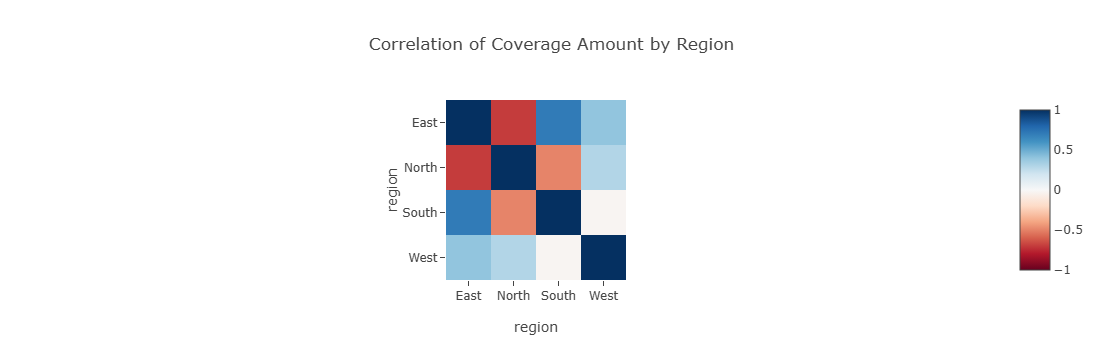

In [7]:
def correlation_analysis(df):
    pivot = df.pivot_table(values='coverage_amount', index='policy_type', columns='region', aggfunc='sum').fillna(0)
    corr_matrix = pivot.corr()
    fig = px.imshow(corr_matrix, color_continuous_scale='RdBu', zmin=-1, zmax=1, title='Correlation of Coverage Amount by Region')
    fig.show()
    return fig, corr_matrix

# Run correlation analysis
policies = get_policies()
fig_corr, corr_matrix = correlation_analysis(policies)

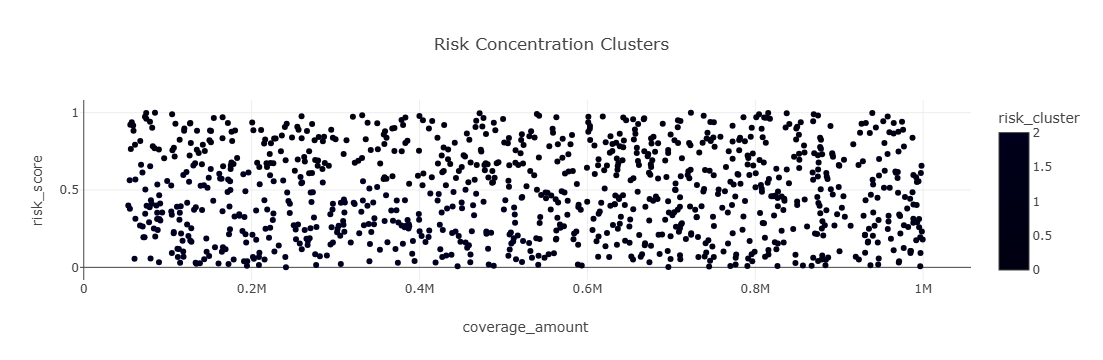

High risk concentration detected: 197,114,377.39 in cluster 0


In [8]:
def detect_risk_concentrations(df):
    features = df[['coverage_amount', 'risk_score']]
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(features)
    kmeans = KMeans(n_clusters=3, random_state=42)
    df['risk_cluster'] = kmeans.fit_predict(scaled_features)
    fig = px.scatter(df, x='coverage_amount', y='risk_score', color='risk_cluster',
                     hover_data=['policy_id', 'policy_type', 'region'], title='Risk Concentration Clusters')
    fig.show()
    high_risk = df[df['risk_cluster'] == df['risk_cluster'].value_counts().idxmax()]
    alerts = []
    if high_risk['coverage_amount'].sum() > df['coverage_amount'].sum() * 0.3:
        alerts.append(f"High risk concentration detected: {high_risk['coverage_amount'].sum():,.2f} in cluster {df['risk_cluster'].value_counts().idxmax()}")
    return df, alerts

# Detect concentrations
policies, alerts = detect_risk_concentrations(policies)
for alert in alerts:
    print(alert)

In [ ]:
def monte_carlo_simulation(df, n_simulations=1000):
    simulated_losses = []
    for _ in range(n_simulations):
        temp_df = df.copy()
        for idx, row in temp_df.iterrows():
            claim_probability = row['risk_score'] * 0.1
            if np.random.random() < claim_probability:
                temp_df.loc[idx, 'claims'] += np.random.uniform(10000, 500000)
        simulated_losses.append(temp_df['claims'].sum())
    fig = px.histogram(simulated_losses, nbins=50, title='Monte Carlo Simulation: Total Claims Distribution')
    fig.show()
    return pd.DataFrame(simulated_losses, columns=['total_claims'])

# Run simulation
simulated_losses = monte_carlo_simulation(policies)

In [1]:
import streamlit as st
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import plotly.express as px
import time
import uuid

# Page config must be first
st.set_page_config(page_title='Insurance Risk Management Dashboard', layout='wide')

# Custom CSS
st.markdown('''
    <style>
        body { font-family: Arial, sans-serif; background-color: #f5f5f5; color: #333; }
        .sidebar .sidebar-content { background-color: #fff; padding: 20px; }
        .main { margin-left: 270px; }
        .header { background-color: #007bff; color: white; padding: 10px; text-align: center; }
        .content { padding: 20px; }
        .stButton>button { background-color: #007bff; color: white; }
    </style>
''', unsafe_allow_html=True)

# Data functions
@st.cache_data
def get_policies():
    if 'policies' not in st.session_state:
        np.random.seed(42)
        n_policies = 1000
        policies = pd.DataFrame({
            'policy_id': [str(uuid.uuid4()) for _ in range(n_policies)],
            'policy_type': np.random.choice(['Auto', 'Home', 'Health', 'Commercial'], n_policies),
            'region': np.random.choice(['North', 'South', 'East', 'West'], n_policies),
            'coverage_amount': np.random.uniform(50000, 1000000, n_policies),
            'premium': np.random.uniform(1000, 10000, n_policies),
            'risk_score': np.random.uniform(0, 1, n_policies),
            'claims': np.zeros(n_policies),
            'last_updated': [time.time()] * n_policies
        })
        policies.to_csv('streamlit_insurance_policies.csv', index=False)
        st.session_state.policies = policies
        st.session_state.claims = pd.DataFrame({
            'policy_id': pd.Series(dtype='str'),
            'claim_amount': pd.Series(dtype='float64'),
            'claim_time': pd.Series(dtype='float64')
        })
    return st.session_state.policies

def simulate_real_time_claims():
    policies = st.session_state.policies
    new_claims = pd.DataFrame({
        'policy_id': np.random.choice(policies['policy_id'], size=5),
        'claim_amount': np.random.uniform(10000, 200000, 5),
        'claim_time': [time.time()] * 5
    })
    st.session_state.claims = pd.concat([st.session_state.claims, new_claims], ignore_index=True)
    for policy_id, claim_amount in zip(new_claims['policy_id'], new_claims['claim_amount']):
        policies.loc[policies['policy_id'] == policy_id, 'claims'] += claim_amount
    policies.to_csv('streamlit_insurance_policies.csv', index=False)
    return new_claims

@st.cache_data
def aggregate_risk(df):
    type_agg = df.groupby('policy_type').agg({
        'coverage_amount': 'sum', 'premium': 'sum', 'risk_score': 'mean', 'claims': 'sum'
    }).reset_index()
    type_agg['exposure_ratio'] = type_agg['coverage_amount'] / type_agg['premium']
    region_agg = df.groupby('region').agg({
        'coverage_amount': 'sum', 'premium': 'sum', 'risk_score': 'mean', 'claims': 'sum'
    }).reset_index()
    region_agg['exposure_ratio'] = region_agg['coverage_amount'] / region_agg['premium']
    return type_agg, region_agg

def correlation_analysis(df):
    pivot = df.pivot_table(values='coverage_amount', index='policy_type', columns='region', aggfunc='sum').fillna(0)
    corr_matrix = pivot.corr()
    return px.imshow(corr_matrix, color_continuous_scale='RdBu', zmin=-1, zmax=1, title='Correlation of Coverage Amount by Region'), corr_matrix

@st.cache_data
def detect_risk_concentrations(df):
    features = df[['coverage_amount', 'risk_score']]
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(features)
    kmeans = KMeans(n_clusters=3, random_state=42)
    df['risk_cluster'] = kmeans.fit_predict(scaled_features)
    high_risk = df[df['risk_cluster'] == df['risk_cluster'].value_counts().idxmax()]
    alerts = []
    if high_risk['coverage_amount'].sum() > df['coverage_amount'].sum() * 0.3:
        alerts.append(f"High risk concentration detected: {high_risk['coverage_amount'].sum():,.2f} in cluster {df['risk_cluster'].value_counts().idxmax()}")
    return df, alerts

def monte_carlo_simulation(df, n_simulations=1000):
    simulated_losses = []
    for _ in range(n_simulations):
        temp_df = df.copy()
        for idx, row in temp_df.iterrows():
            claim_probability = row['risk_score'] * 0.1
            if np.random.random() < claim_probability:
                temp_df.loc[idx, 'claims'] += np.random.uniform(10000, 500000)
        simulated_losses.append(temp_df['claims'].sum())
    return pd.DataFrame(simulated_losses, columns=['total_claims'])

# Sidebar Navigation
st.sidebar.header('Navigation')
page = st.sidebar.radio('Select Page', ['Overview', 'Risk Analysis', 'Stress Testing', 'Real-Time Dashboard'])

# Main Dashboard
st.markdown('<div class="header">Insurance Portfolio Risk Management Dashboard</div>', unsafe_allow_html=True)
policies = get_policies()

if page == 'Overview':
    st.header('Portfolio Overview')
    type_agg, region_agg = aggregate_risk(policies)
    col1, col2 = st.columns(2)
    with col1:
        st.subheader('Exposure by Policy Type')
        fig_type = px.bar(type_agg, x='policy_type', y='coverage_amount', title='Exposure by Policy Type', text_auto='.2s')
        st.plotly_chart(fig_type, use_container_width=True)
    with col2:
        st.subheader('Exposure by Region')
        fig_region = px.bar(region_agg, x='region', y='coverage_amount', title='Exposure by Region', text_auto='.2s')
        st.plotly_chart(fig_region, use_container_width=True)

elif page == 'Risk Analysis':
    st.header('Risk Analysis')
    fig_corr, corr_matrix = correlation_analysis(policies)
    st.plotly_chart(fig_corr, use_container_width=True)
    st.subheader('Risk Concentrations')
    policies, alerts = detect_risk_concentrations(policies)
    st.plotly_chart(px.scatter(policies, x='coverage_amount', y='risk_score', color='risk_cluster',
                              hover_data=['policy_id', 'policy_type', 'region'], title='Risk Concentration Clusters'),
                    use_container_width=True)
    for alert in alerts:
        st.error(alert)

elif page == 'Stress Testing':
    st.header('Stress Testing')
    st.subheader('Monte Carlo Simulation')
    n_simulations = st.slider('Number of Simulations', 100, 2000, 1000)
    simulated_losses = monte_carlo_simulation(policies, n_simulations)
    st.plotly_chart(px.histogram(simulated_losses, x='total_claims', nbins=50, title='Total Claims Distribution'),
                    use_container_width=True)

elif page == 'Real-Time Dashboard':
    st.header('Real-Time Dashboard')
    placeholder = st.empty()
    while True:
        with placeholder.container():
            policies = get_policies()
            new_claims = simulate_real_time_claims()
            col1, col2 = st.columns([3, 1])
            with col1:
                st.subheader('Live Claims Updates')
                st.dataframe(new_claims.tail(10), column_config={
                    'claim_amount': st.column_config.NumberColumn('Claim Amount', format='$%.2f'),
                    'claim_time': st.column_config.DatColumn('Claim Time', format='%Y-%m-%d %H:%M:%S')
                }, use_container_width=True)
            with col2:
                st.subheader('Latest Policies')
                st.dataframe(policies.tail(10), use_container_width=True)
        time.sleep(5)
        st.rerun()


2025-07-08 12:56:08.992 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-08 12:56:08.993 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-08 12:56:09.366 
  command:

    streamlit run C:\Users\mvska\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-07-08 12:56:09.367 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-08 12:56:09.368 No runtime found, using MemoryCacheStorageManager
2025-07-08 12:56:09.371 No runtime found, using MemoryCacheStorageManager
2025-07-08 12:56:09.373 No runtime found, using MemoryCacheStorageManager
2025-07-08 12:56:09.374 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when runn